In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
import plotly.express as px

In [3]:
data=pd.read_csv('./data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [6]:
data.isnull().mean()*100

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

In [7]:
data.shape

(4600, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Droping un necessary columns

In [9]:
data.drop(columns='date',inplace=True)

In [10]:
data.drop(columns='sqft_basement',inplace=True)

In [11]:
data.drop(columns='yr_renovated',inplace=True)

In [12]:
data.drop(columns='street',inplace=True)

In [13]:
data.drop(columns='view',inplace=True)

In [14]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,1955,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,5,3370,1921,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,1966,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1963,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,1976,Redmond,WA 98052,USA


In [15]:
data['statezip']=data['statezip'].str.replace('WA','')

In [16]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,1955,Shoreline,98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,5,3370,1921,Seattle,98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,1966,Kent,98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1963,Bellevue,98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,1976,Redmond,98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,1954,Seattle,98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,1983,Bellevue,98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,2009,Renton,98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1974,Seattle,98178,USA


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4600 non-null   float64
 1   bedrooms     4600 non-null   float64
 2   bathrooms    4600 non-null   float64
 3   sqft_living  4600 non-null   int64  
 4   sqft_lot     4600 non-null   int64  
 5   floors       4600 non-null   float64
 6   waterfront   4600 non-null   int64  
 7   condition    4600 non-null   int64  
 8   sqft_above   4600 non-null   int64  
 9   yr_built     4600 non-null   int64  
 10  city         4600 non-null   object 
 11  statezip     4600 non-null   object 
 12  country      4600 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 467.3+ KB


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4600 non-null   float64
 1   bedrooms     4600 non-null   float64
 2   bathrooms    4600 non-null   float64
 3   sqft_living  4600 non-null   int64  
 4   sqft_lot     4600 non-null   int64  
 5   floors       4600 non-null   float64
 6   waterfront   4600 non-null   int64  
 7   condition    4600 non-null   int64  
 8   sqft_above   4600 non-null   int64  
 9   yr_built     4600 non-null   int64  
 10  city         4600 non-null   object 
 11  statezip     4600 non-null   object 
 12  country      4600 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 467.3+ KB


# Univariate analysis

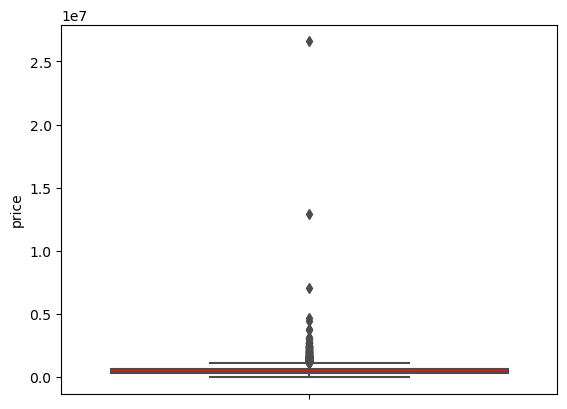

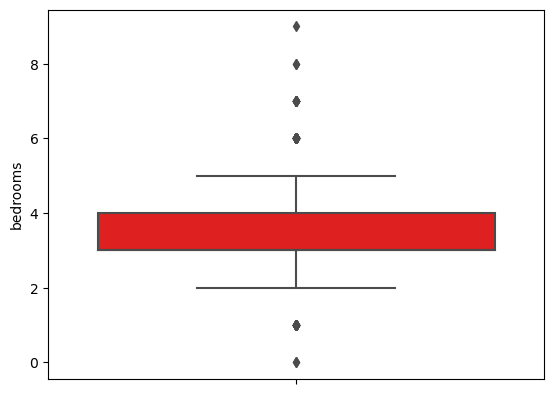

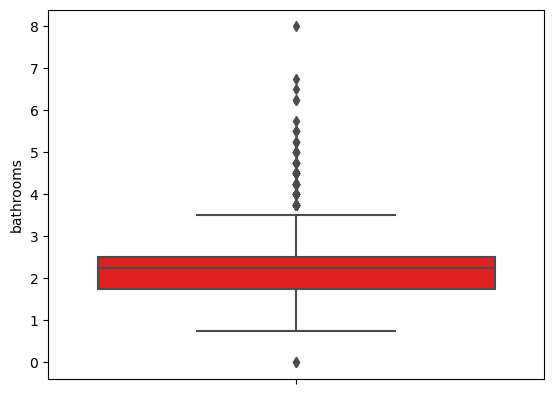

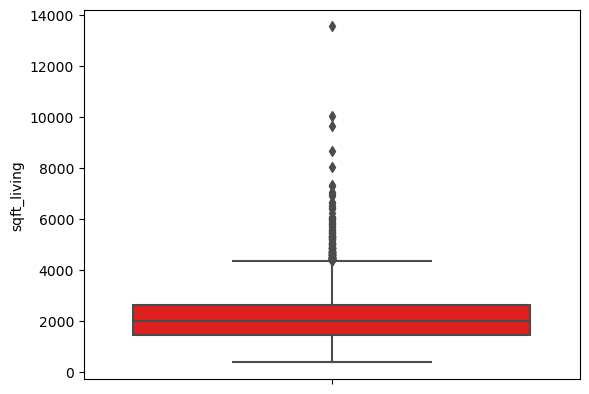

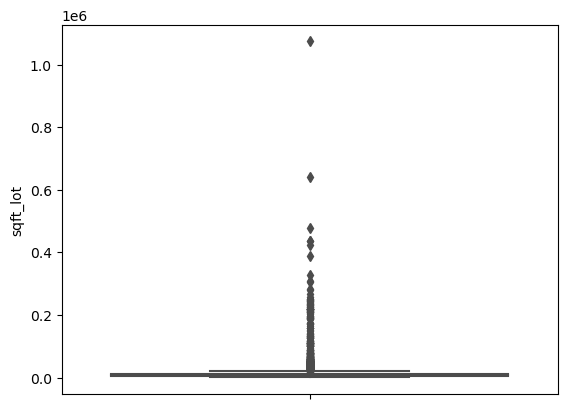

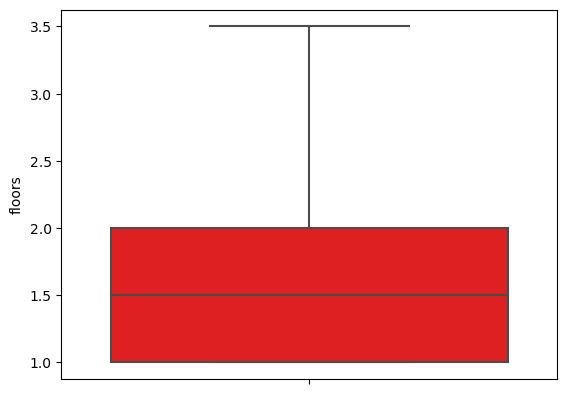

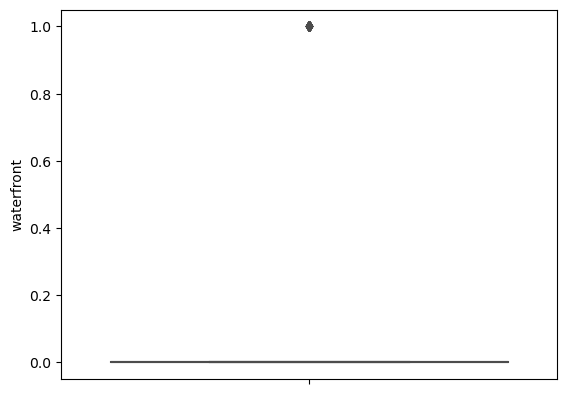

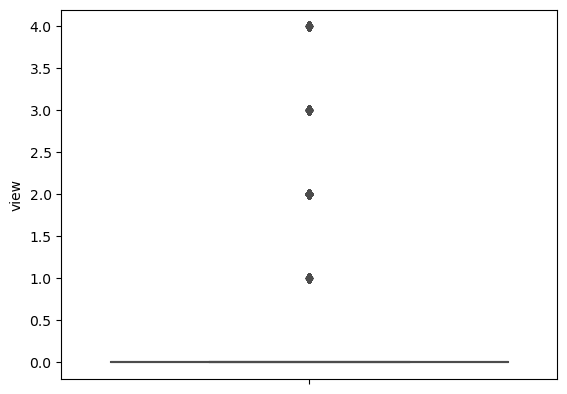

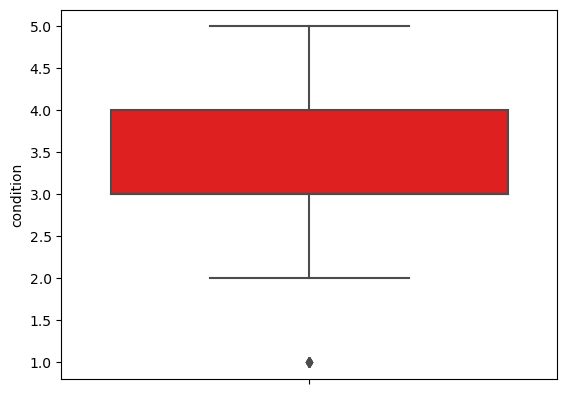

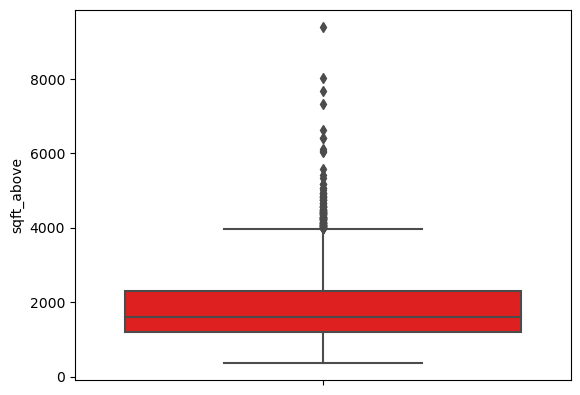

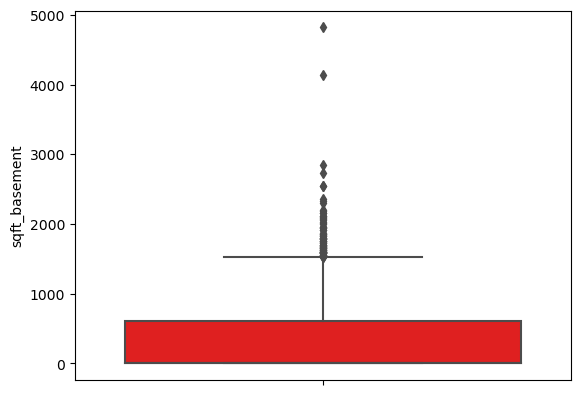

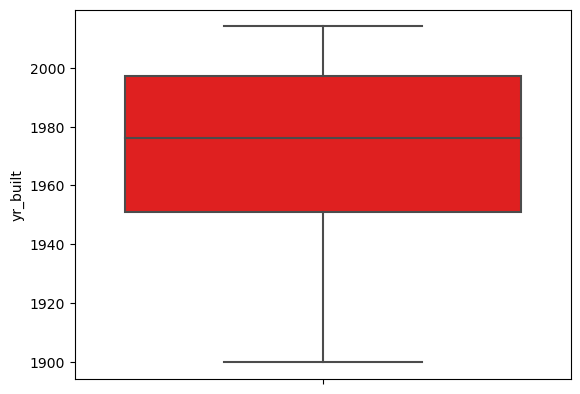

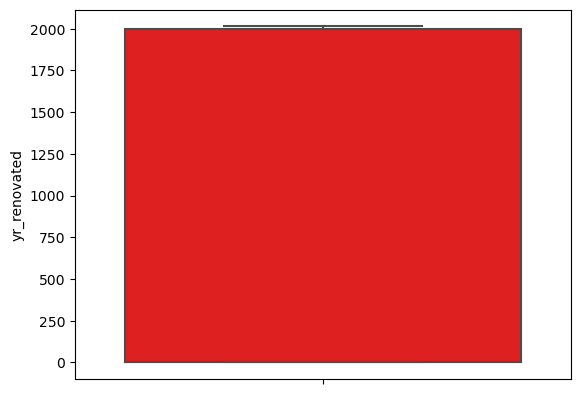

In [8]:

for i in data.columns:
    if data[i].dtypes!="object":
        sns.boxplot(y=data[i],color='red')
        plt.show()

# Treating outliers

In [17]:
def outlier_limit(col):
    Q1,Q3=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return LL,UL

In [18]:
for i in data.columns:
    if data[i].dtypes!='object':
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

In [19]:
data.dropna(inplace=True)

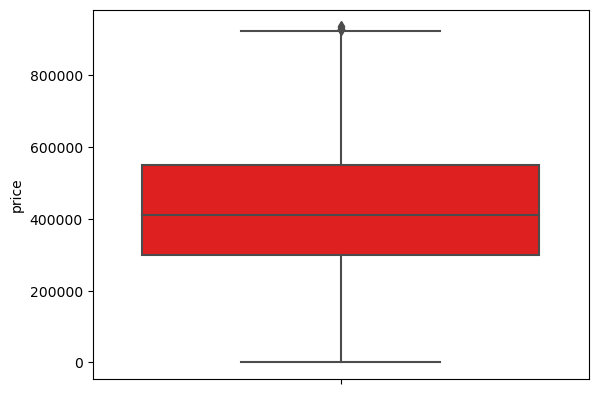

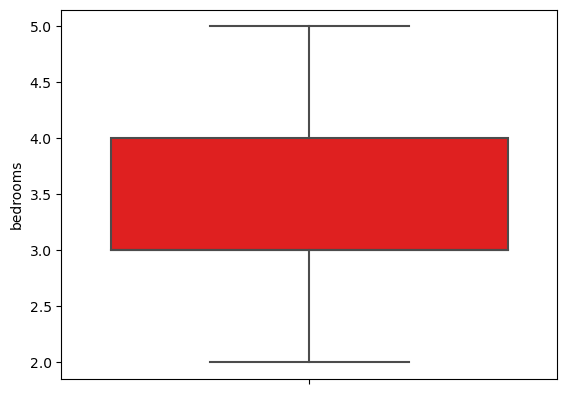

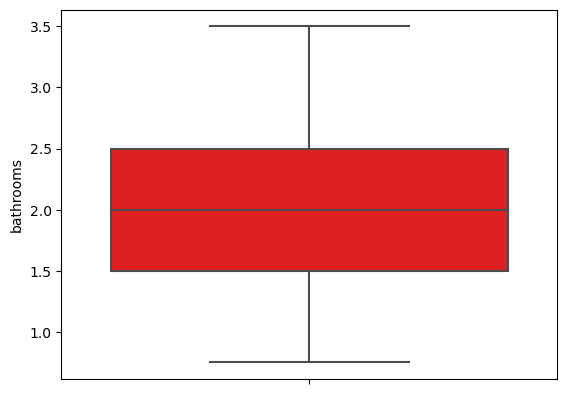

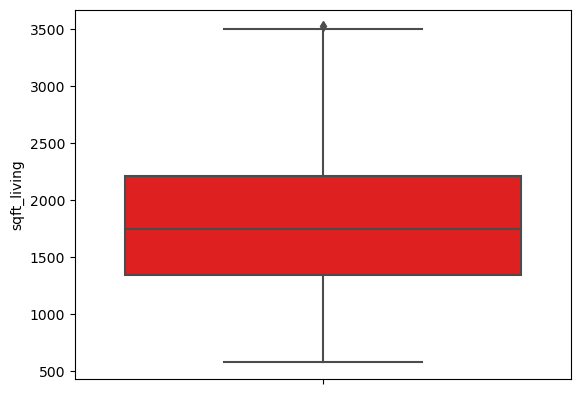

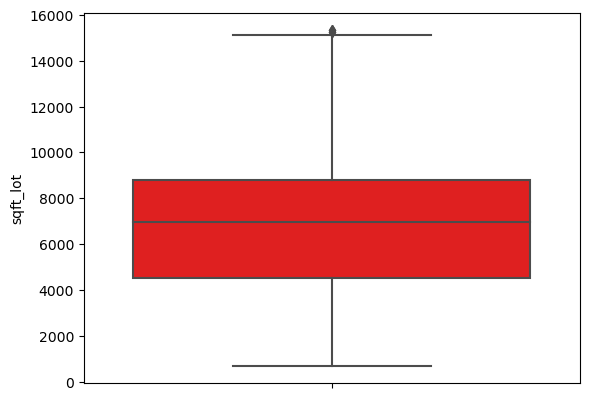

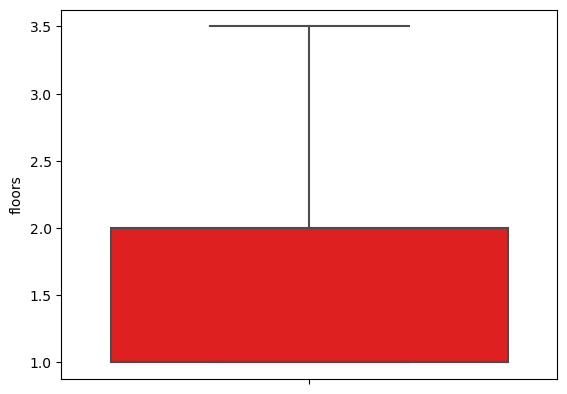

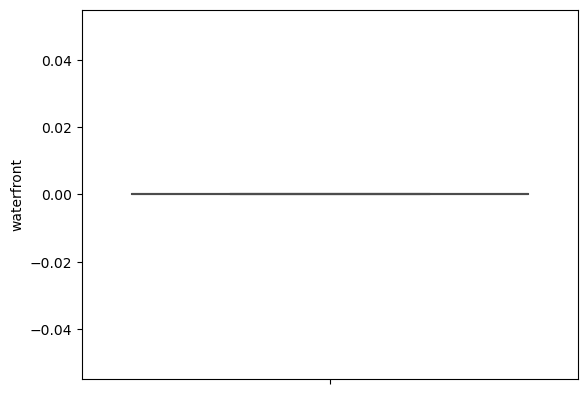

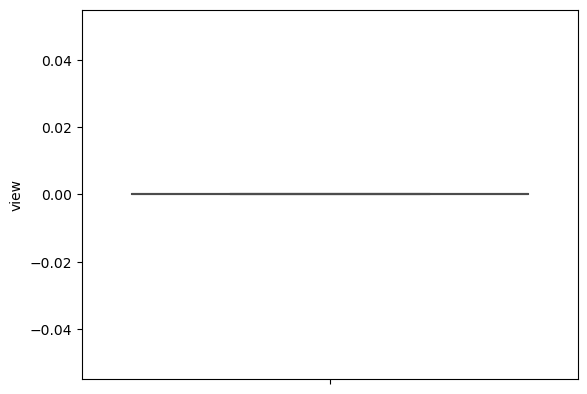

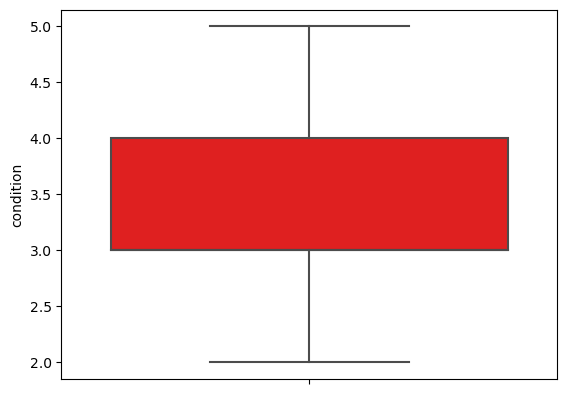

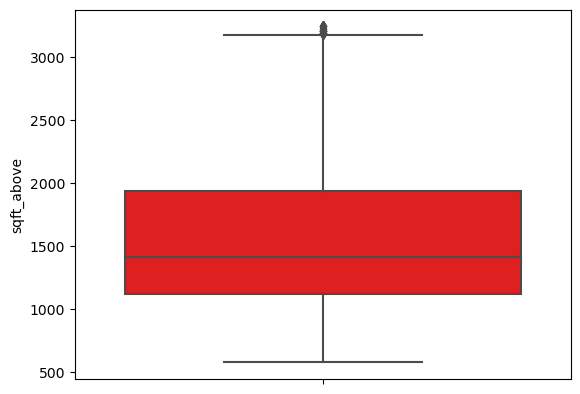

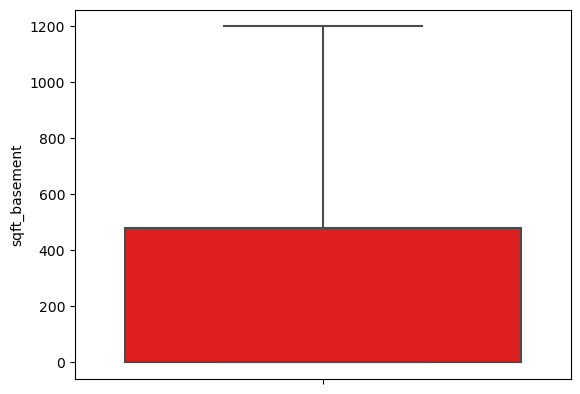

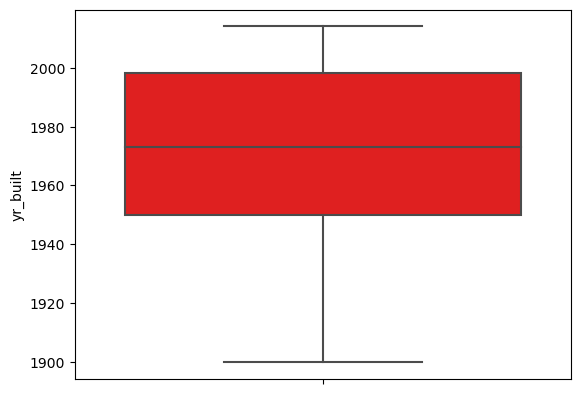

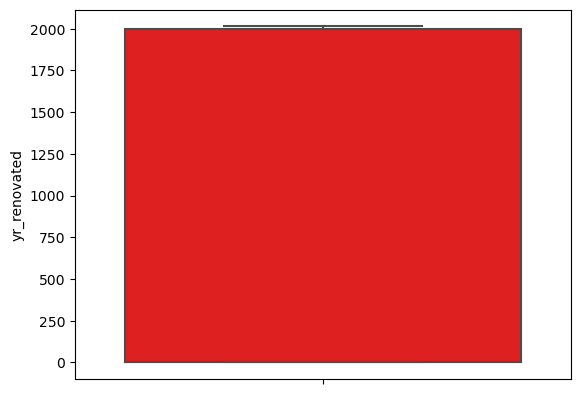

In [20]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.boxplot(y=data[i],color='red')
        plt.show()

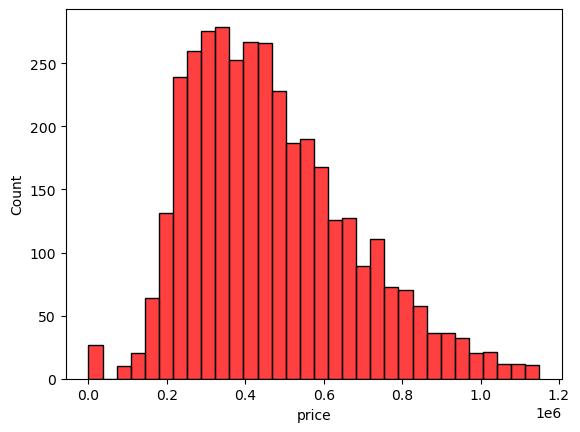

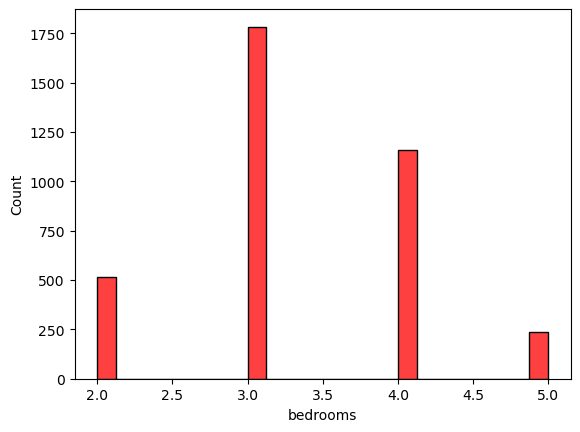

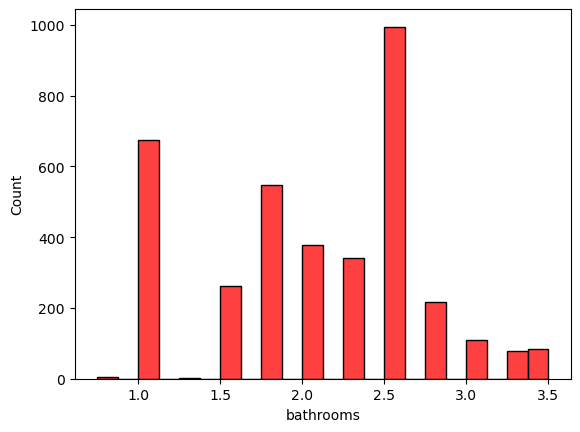

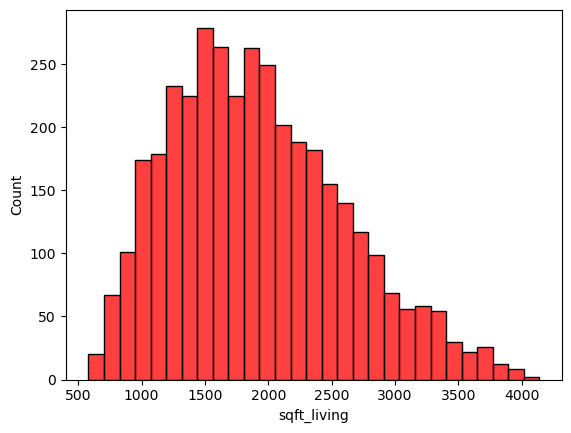

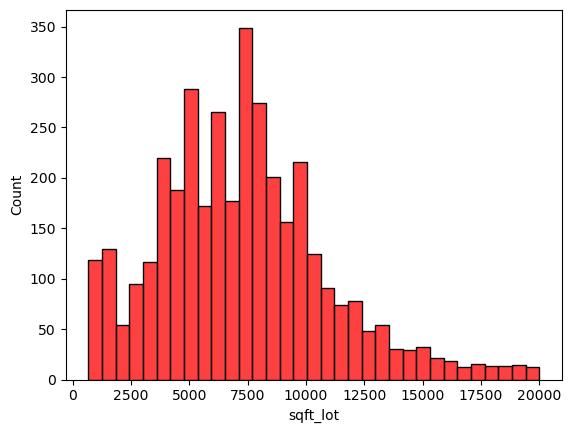

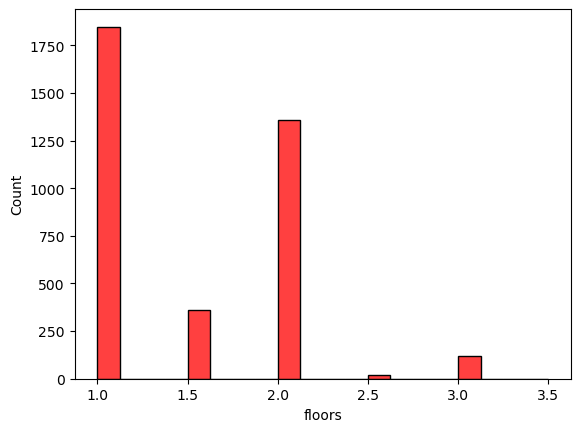

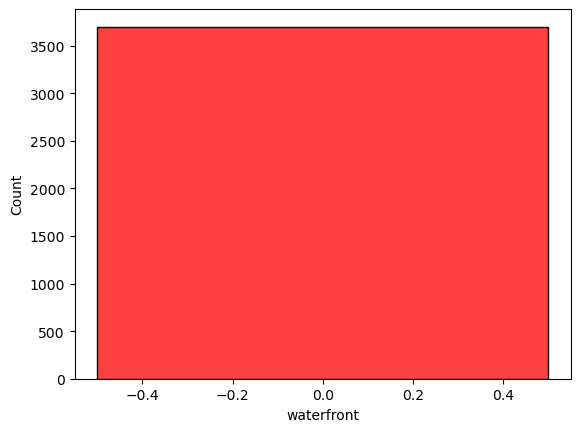

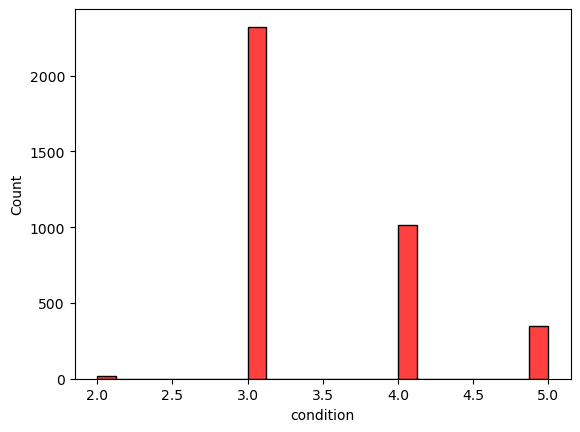

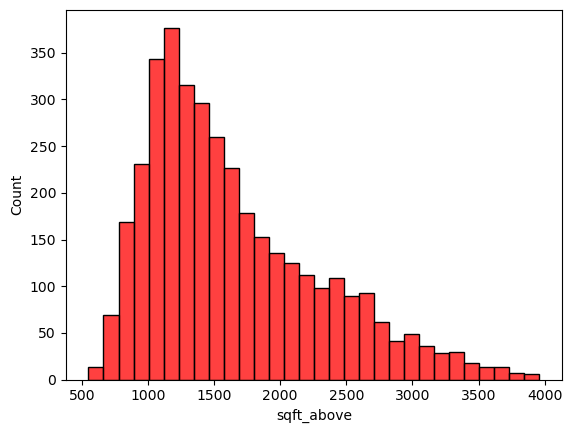

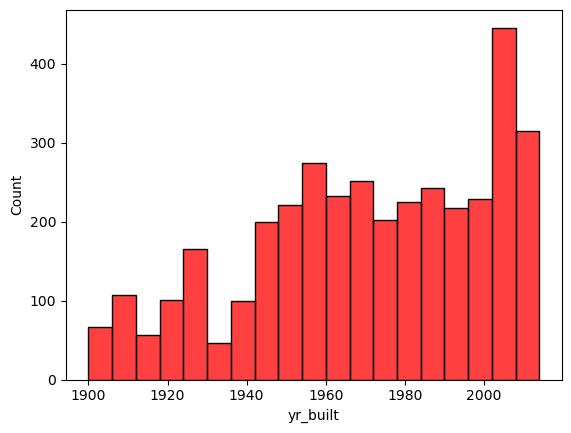

In [24]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.histplot(x=data[i],color= "red")
        plt.show()

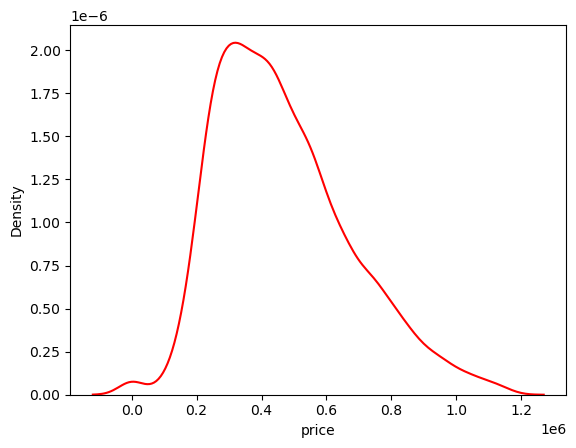

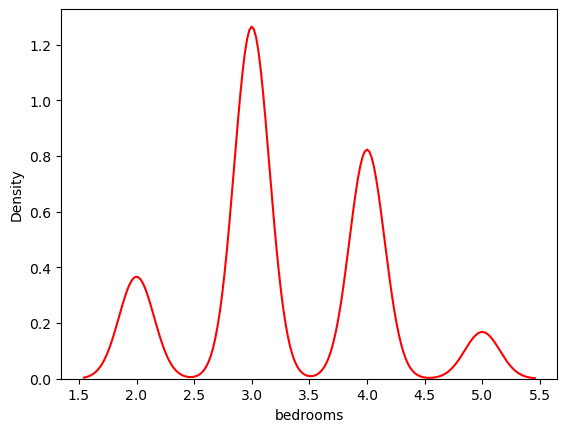

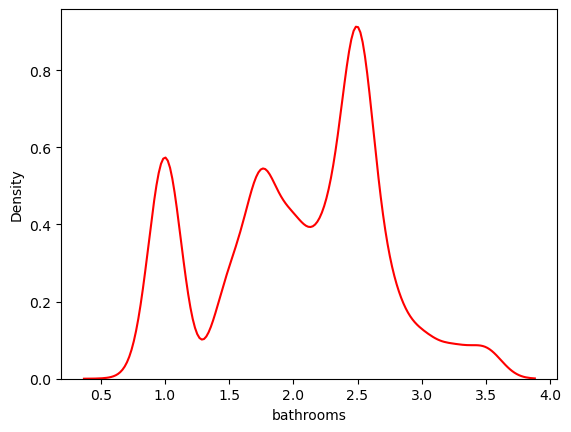

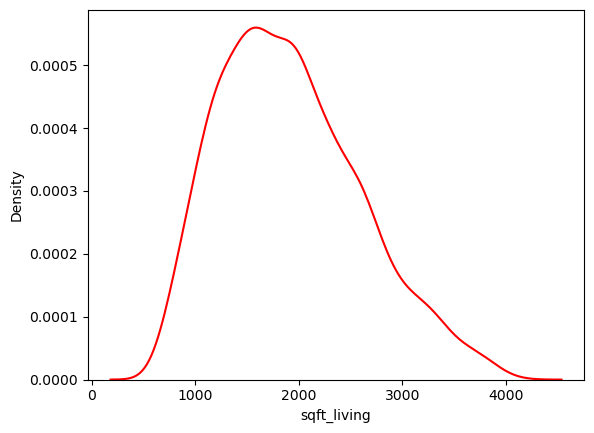

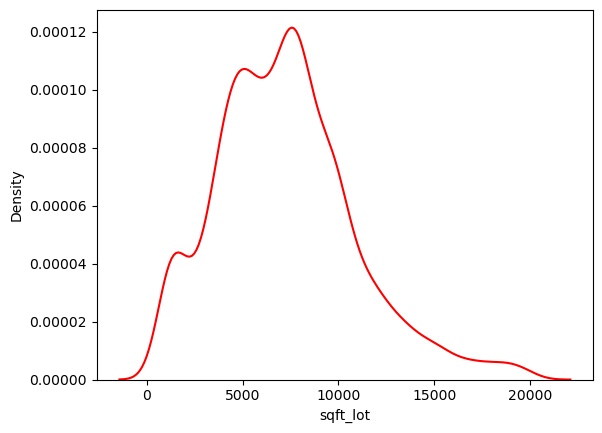

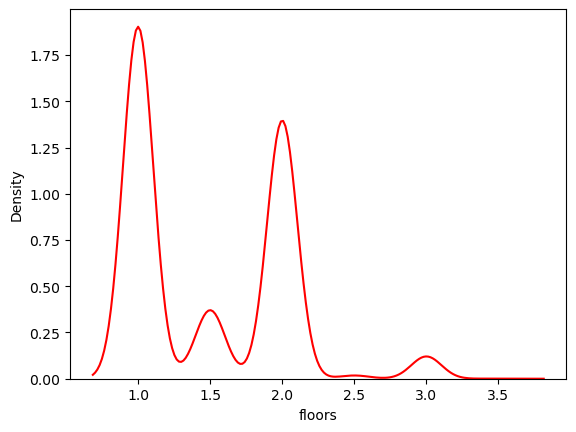

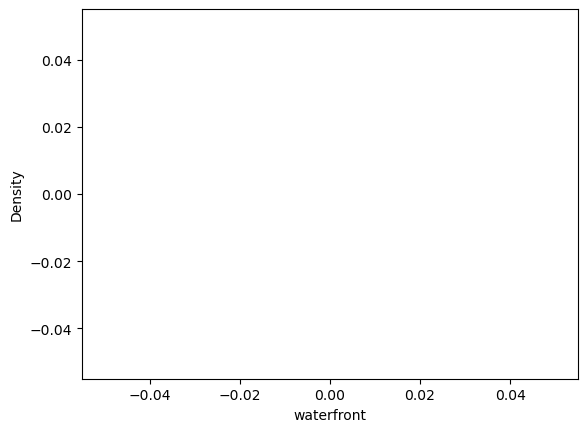

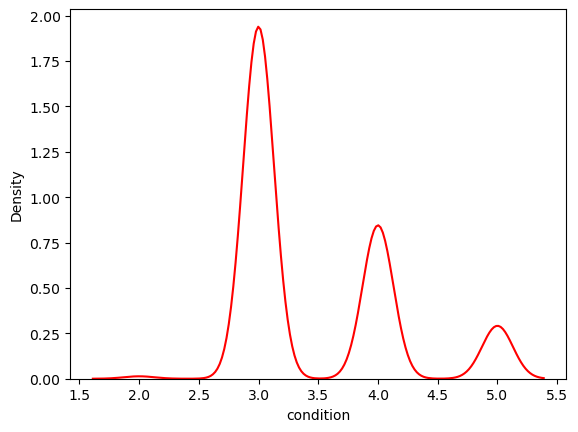

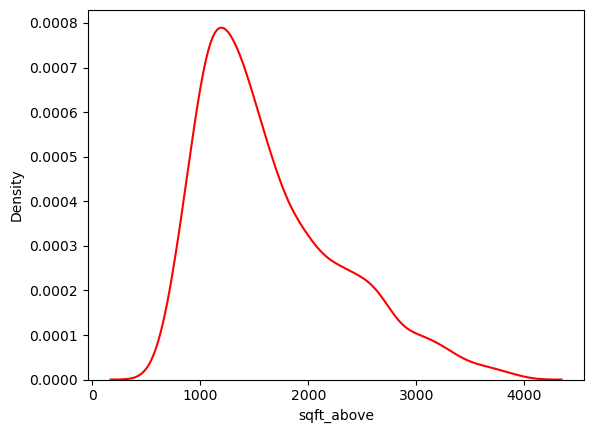

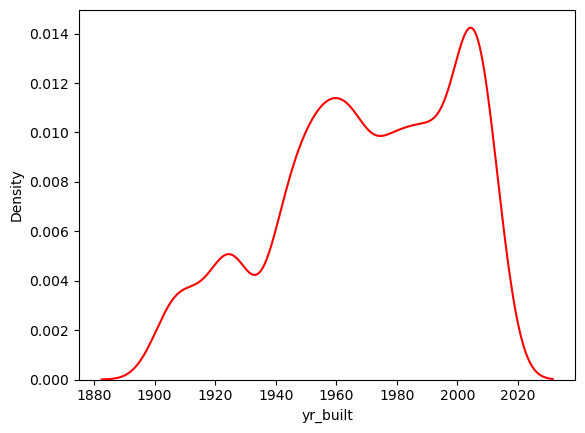

In [25]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.kdeplot(x=data[i],color="red")
        plt.show()

#  Multy variate analysis

Text(0.5, 1.0, 'Bedroom and Bathroom Ratio')

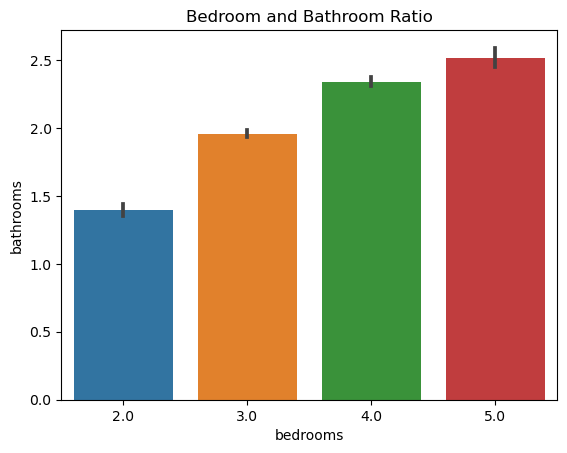

In [26]:
sns.barplot(x='bedrooms',y='bathrooms',data=data.sort_values(by='bedrooms'))
plt.title('Bedroom and Bathroom Ratio')

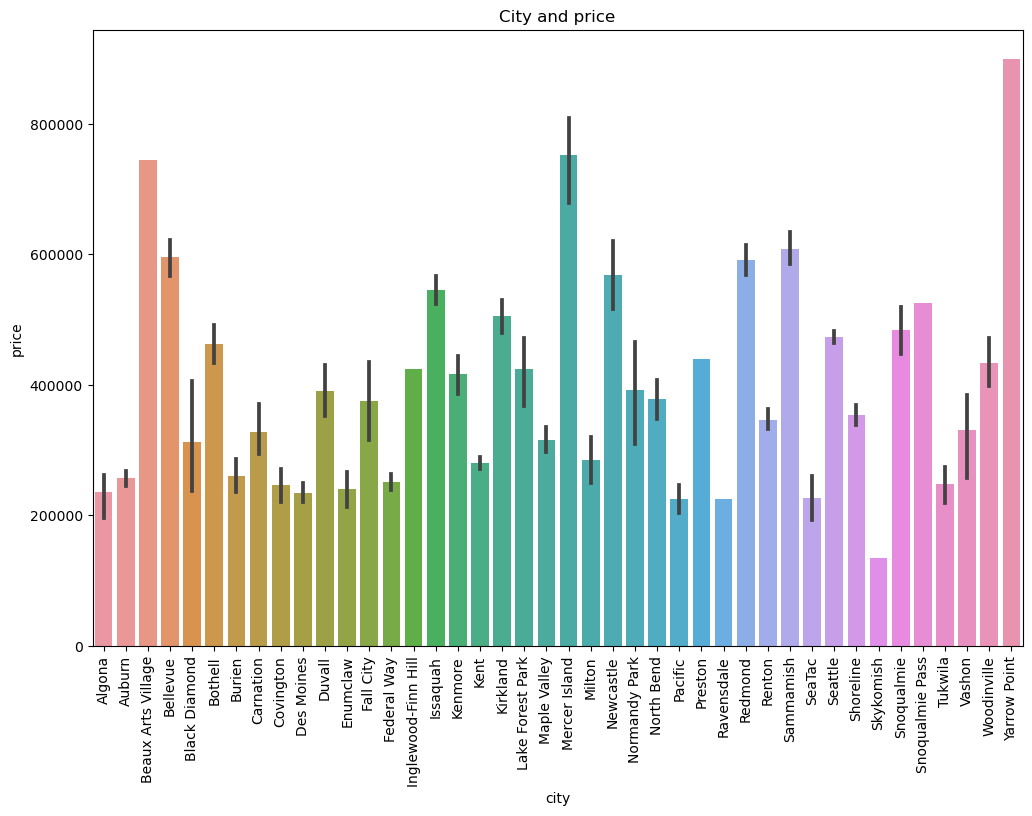

In [25]:
plt.figure(figsize=[12,8])
sns.barplot(x='city',y='price',data=data.sort_values(by='city',ascending=True))
plt.title('City and price')
plt.xticks(rotation=90)
plt.show()

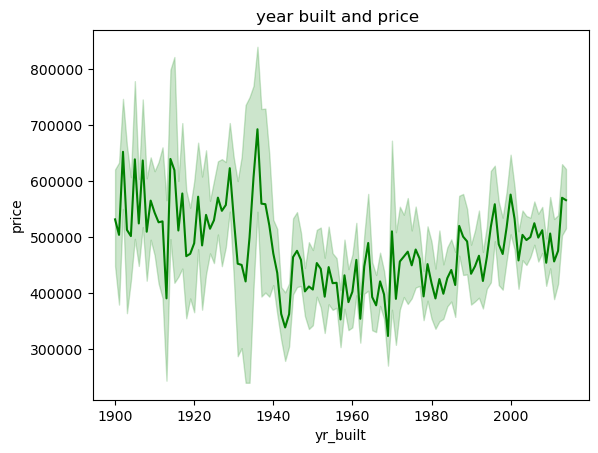

In [28]:
sns.lineplot(x='yr_built',y='price',data=data.sort_values(by='yr_built',ascending=True),color='green')
plt.title('year built and price ')
plt.show()


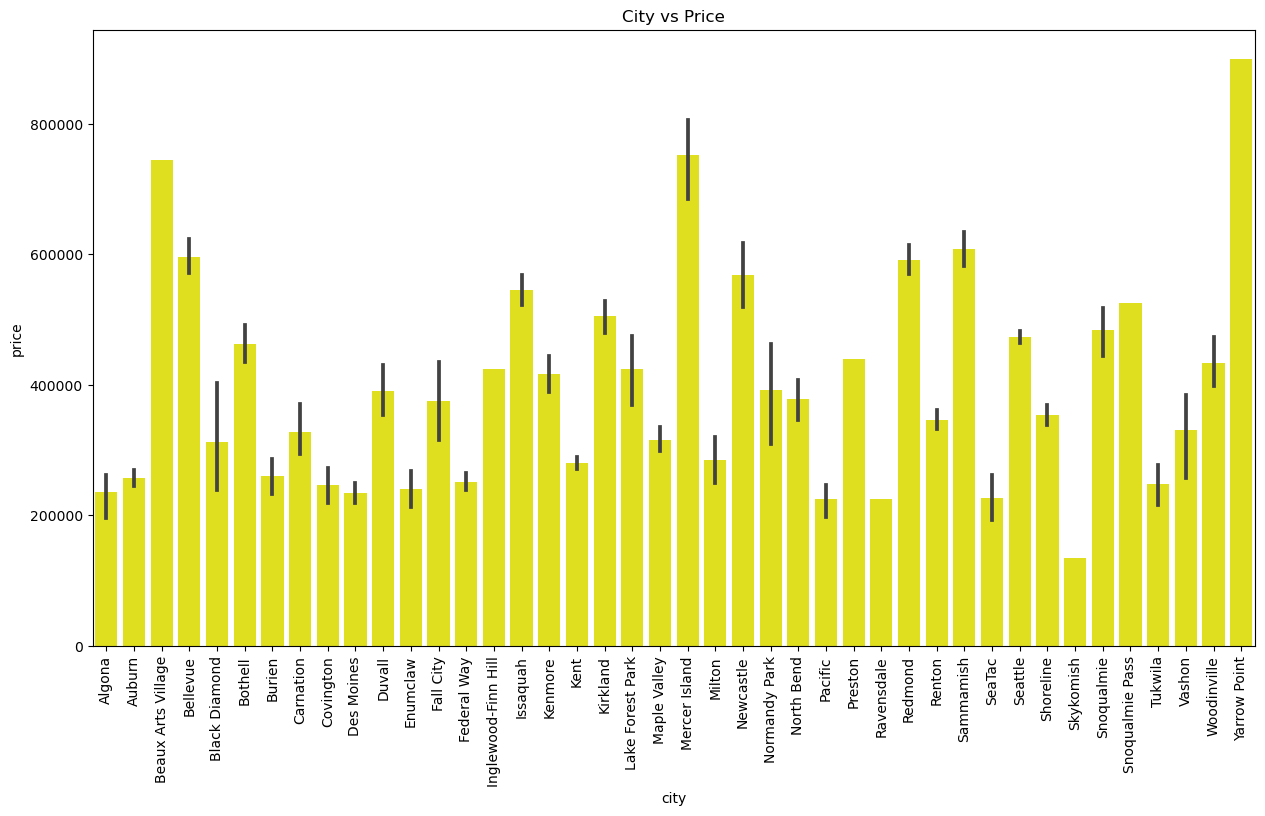

In [27]:
plt.figure(figsize=[15,8])
sns.barplot(x='city',y='price',data=data.sort_values(by='city',ascending=True),color='yellow')
plt.title('City vs Price')
plt.xticks(rotation=90)
plt.show()


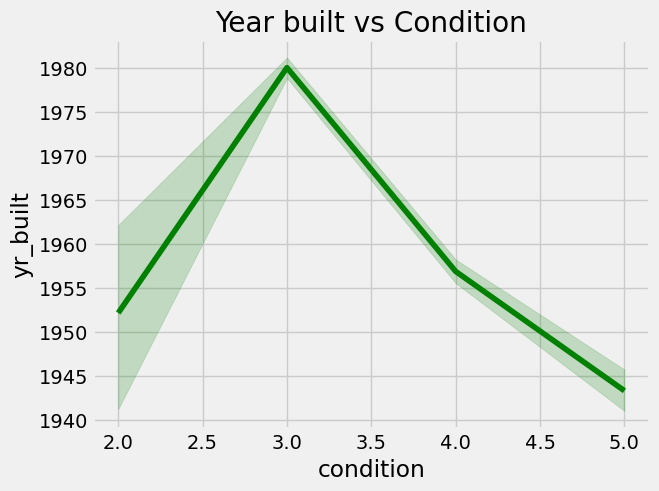

<Figure size 2000x800 with 0 Axes>

In [61]:
plt.title('Year built vs Condition')
sns.lineplot(x='condition',y='yr_built',data=data.sort_values(by='condition',ascending=True),color='green')
plt.figure(figsize=[20,8])
plt.show()


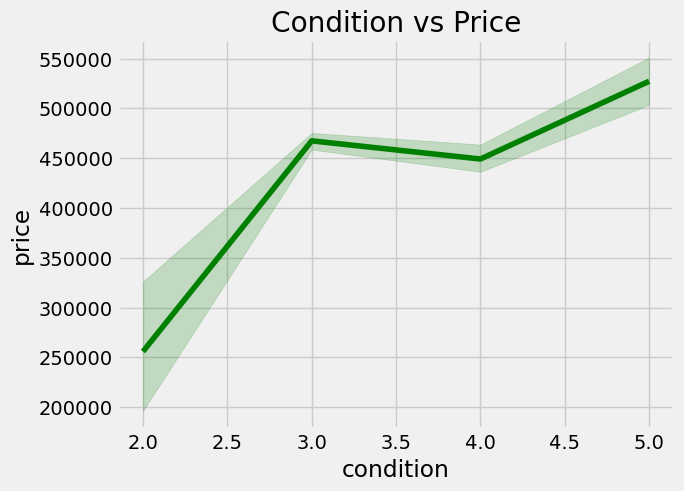

In [63]:
plt.title('Condition vs Price')
sns.lineplot(x='condition',y='price',data=data.sort_values(by='condition',ascending=True),color='green')
plt.show()



# Label encoding the columns

In [31]:
la=LabelEncoder()
col=['city','statezip','country' ]
data[col]=data[col].apply(la.fit_transform)

In [32]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,city,statezip,country
0,313000.0,3.0,1.50,1340.0,7912.0,1.5,0.0,3.0,1340.0,1955.0,36,62,0
2,342000.0,3.0,2.00,1930.0,11947.0,1.0,0.0,4.0,1930.0,1966.0,18,26,0
3,420000.0,3.0,2.25,2000.0,8030.0,1.0,0.0,4.0,1000.0,1963.0,3,7,0
4,550000.0,4.0,2.50,1940.0,10500.0,1.0,0.0,4.0,1140.0,1976.0,31,31,0
5,490000.0,2.0,1.00,880.0,6380.0,1.0,0.0,3.0,880.0,1938.0,35,54,0


# Checking the correlation with target value

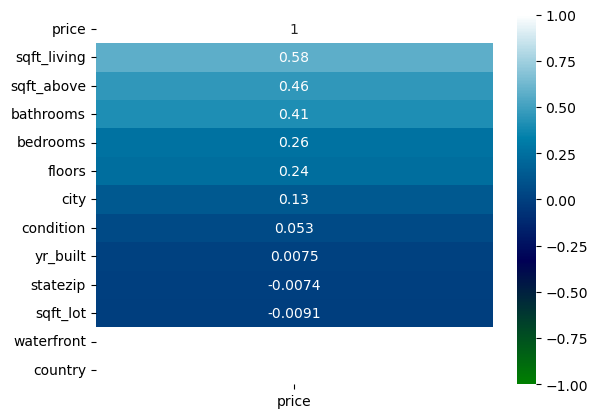

In [33]:
sns.heatmap(data.corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap="ocean");


# Scaling

### By selecting highly related values

In [34]:
rs=RobustScaler()

In [35]:
x=data[['sqft_living']].values
y=data[['price']].values

In [36]:
x=rs.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Cross validation

In [38]:
models={
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [39]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  37.3745301731692
training_score:  32.11056200828762
testing_score:  37.3745301731692
mae:  127180.64427121845
mse:  24920886553.867516
rmse_test:  157863.5060863261
****************************************************************************************************
model trained with Ridge
r2score:  37.372668045868494
training_score:  32.11054788098793
testing_score:  37.372668045868494
mae:  127185.53540367779
mse:  24921627560.0961
rmse_test:  157865.85305282488
****************************************************************************************************
model trained with LinearSVR
r2score:  -526.1970749825639
training_score:  -498.1940291399177
testing_score:  -526.1970749825639
mae:  457662.8804413657
mse:  249185935197.85913
rmse_test:  499185.2714151922
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  27.76757424133056
traini

# Proceed with LeniearRegression

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)


In [41]:
model=LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x)

In [44]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [45]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,313000.0,367736.291968
1,342000.0,468924.461050
2,420000.0,480929.837043
3,550000.0,470639.514763
4,490000.0,288843.821158


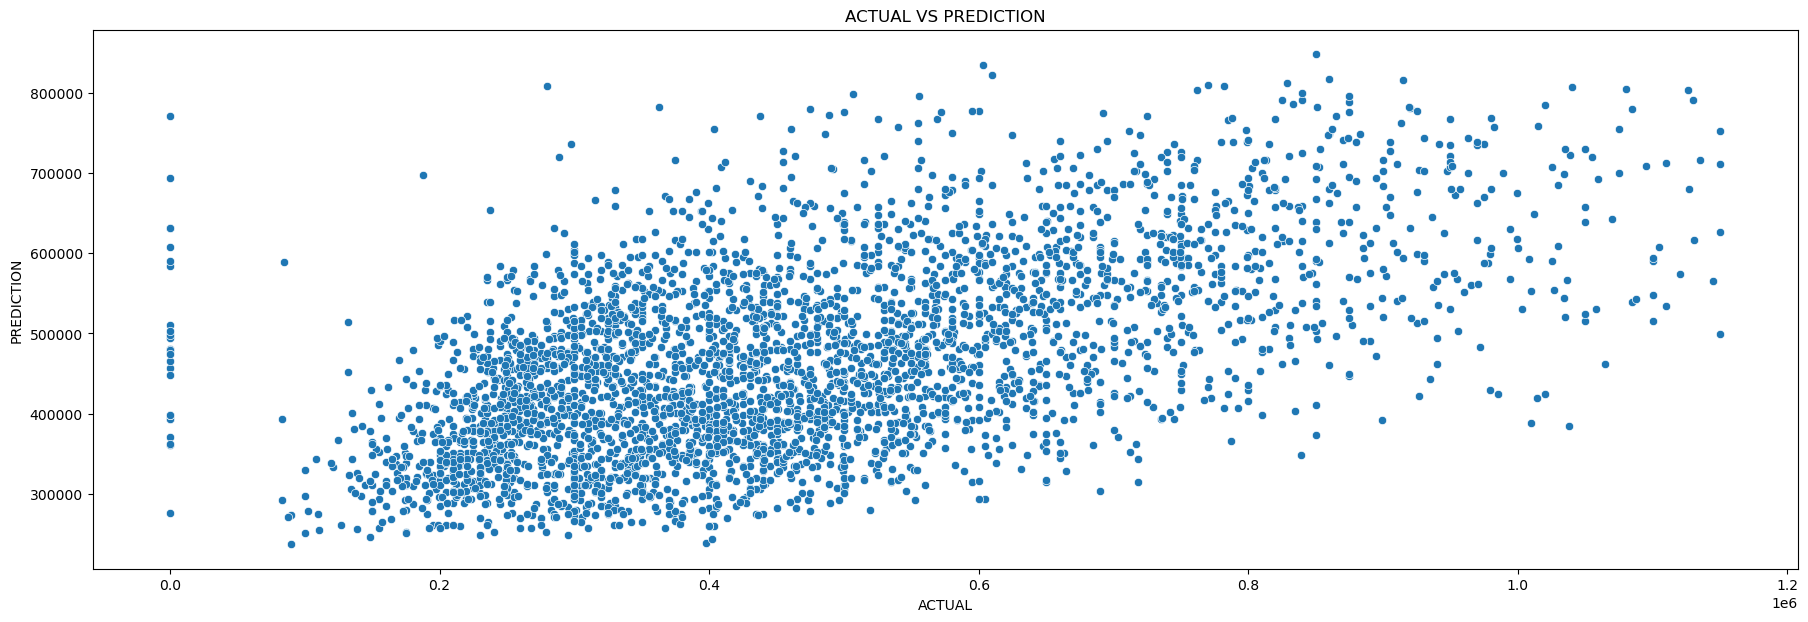

In [46]:
plt.figure(figsize=(22,7))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION")
plt.style.use('fivethirtyeight')